# Lojistik Regression

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Model

In [19]:
# veri setini import edelim ve inceleyelim

In [3]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()

In [7]:
df.isnull().sum().sum # null değerimiz yokmuş

<bound method NDFrame._add_numeric_operations.<locals>.sum of Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64>

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

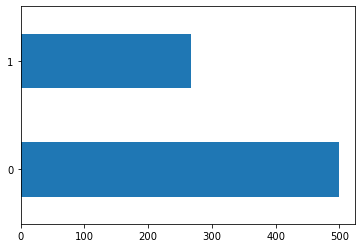

In [17]:
df["Outcome"].value_counts().plot.barh();

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [22]:
y = df["Outcome"]
X = df.drop("Outcome", axis = 1)

### statsmodels ile inceleme

In [24]:
import statsmodels.api as sm

In [27]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Sep 2022   Pseudo R-squ.:                 0.05922
Time:                        09:14:31   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [28]:
# P>z olan kısımdaki değer (pvalue) 0.05'den büyükse o değişkenlerin anlamlılığı daha azdır diyebiliriz
# zaten katsayıları da öbürlerinden düşük göründüğü gibi

### scikit ile inceleme

In [29]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [31]:
loj_model.intercept_ # sabit değeri

array([-5.85986161])

In [33]:
loj_model.coef_ # bütün bağımsız değişkenlerin katsayıları

array([[ 1.16912604e-01,  2.83133925e-02, -1.69330599e-02,
         7.86949021e-04, -6.33349234e-04,  5.94785140e-02,
         6.60167821e-01,  7.17936702e-03]])

# Tahmin ve Model Tuning

Lojistik regresyonun dışsal bir model hiperparametresi yok, burada optimize edilebilecek parametre olarak değerlendirebileceğimiz tek parametre sabit (intercept). 

Burada bir model tuning işleminden çok bir model doğrulama işlemi gerçekleştiricez.

Sınıflandırma problemlerinde ele aldığınız bağımlı değişkenin ilgilendiğiniz sınıfın doğru sınıf olup olmadığını kontrol edip bundan emin olmanız gerekir. Yani bağımlı değişkenimiz olacak sınıfı doğru belirlediğimizden emin olmamız gerekir ve dönüşüm işleminin de doğruluğuna dikkat etmeliyiz.

In [34]:
# karmaşıklık matrisi oluşturma ve accuracy skoruna erişme

In [49]:
# ALT KISIMLARDA AMAÇ DOĞRULUK TAHMİNİ

In [35]:
y_pred = loj_model.predict(X)

In [38]:
confusion_matrix(y, y_pred) # 1-0 1-0 şeklinde gerçekte 1 olan 1 tahmin edilen vs vs

array([[448,  52],
       [121, 147]])

In [40]:
accuracy_score(y, y_pred) # 0.77 doğru sınıflandırma oranı

0.7747395833333334

In [42]:
print(classification_report(y, y_pred)) 
# en detaylı sınıflandırma algoritması sonucu değerlendiren çıktılardan birisi

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [47]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [45]:
# burada bize 1-0 şeklinde değer vermesi yerine 1 OLMA OLASILIĞI şeklinde değer vermesini istersek:
# (bunu istememe sebebimiz kendi eşik olasılık değerimizi koyup ona göre sonuç üretmek olabilir mesela)

In [48]:
loj_model.predict_proba(X)[0:10] # ilk sütın 0, 2. sütun 1 olma olasılığı

array([[0.35166451, 0.64833549],
       [0.91641945, 0.08358055],
       [0.2257798 , 0.7742202 ],
       [0.92054046, 0.07945954],
       [0.17167558, 0.82832442],
       [0.79790744, 0.20209256],
       [0.87907136, 0.12092864],
       [0.27656592, 0.72343408],
       [0.31934154, 0.68065846],
       [0.92202008, 0.07797992]])

In [50]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [52]:
# verilen olasılıklarla bir eşik olasılık değeri belirleyip buna göre tahmin yaptırma istersek:
# burada olay kendi belirleyebildiğimiz bir eşik değerin olması

In [56]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:, 1]
y_probs[0:5]

array([0.64833549, 0.08358055, 0.7742202 , 0.07945954, 0.82832442])

In [59]:
y_pred = [1 if i>0.5 else 0 for i in y_probs]

In [61]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [62]:
# burada olay bu dönüştürme işlemini farklı kriterlere göre yapabilecek olmamız. Yani i>0.9 da girilebilir

In [63]:
# kendi eşik değerimizle dönüştürüp sonuç bulduktan sonra tekrar doğrulama adımları kullanılabilir.

In [64]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

In [67]:
accuracy_score(y, y_pred) # genelde accuracy scordan gidilir doğruluğa bakılırken

0.7747395833333334

In [66]:
print(classification_report(y, y_pred)) 

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [69]:
# roc eğrisinde ortadaki çizgiden uzak olmamız iyi bir gösterge oluyor
# roc auc ile buna da bakalım

In [68]:
from sklearn.metrics import roc_auc_score,roc_curve

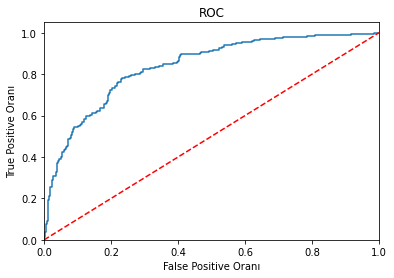

In [70]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

### Model doğrulama (CV)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [104]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [105]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [106]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean() # en DOĞRU sonuç

0.7704710144927536